In [222]:
from scipy.stats import mannwhitneyu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from utils import *
import seaborn as sns

### Participant codes

**Young people 18-34** : 
- YH0040 : Woman, R
- YH0038 : Woman, R
- YH0033 : Woman, R
- YH0031 : Man, R

**Middle age people 35-59** :
- OH0037 : Man, Ambidextrous

**Old people 60-80** :
- OH0029 : Woman, R

**Amputees people (all middle age)** :
- OH0042 : Man, L cosmetic prosthesis on right arm
- OH0025 : Woman, R, cosmetic prosthesis on left arm
- OH0034 : Man, L, myoelectric prosthesis on right arm

### First, prepare healthy and amputees data to make it easier to compare between them based on events

In [237]:
participants = {'healthy': ['YH0040', 'YH0033', 'YH0031', 'OH0029'],
                'amputees': ['OH0042', 'OH0025', 'OH0034']}
events = {'Reach to things':0, 'Chop zucchini':1, 'Chop eggplant':2, 'Chop mushrooms':3, 'Chop peppers':4, 'Chop tomatoes':5,
          'Transfer things to containers':6, 'Stirring':7, 'Seasoning':8, 'Washing hands':9, 'Doing dishes':11}
event = {'Reach to things':0}

ids = ['YH0040', 'YH0038', 'YH0033', 'YH0031', 'OH0037', 'OH0029', 'OH0042', 'OH0025', 'OH0034']

body_points = ['nose', 'lefteye', 'righteye', 'leftear', 'rightear',
       'leftshoulder', 'rightshoulder', 'leftelbow', 'rightelbow',
       'leftwrist', 'rightwrist', 'lefthip', 'righthip', 'leftknee',
       'rightknee', 'leftfoot', 'rightfoot', 'neck', 'hips', 'time', 
       'leftarm_centroid', 'rightarm_centroid', 'arms_centroid', 'trunk_centroid']

In [131]:
df1 = pd.read_pickle(f'../data/features/primary_features_YH0040.pkl')
colnames = df1.drop(labels = body_points, axis = 1).columns.values
df_healthy = pd.DataFrame(columns=colnames, index=events.keys())
#df_amputees = pd.DataFrame(columns=colnames, index=events.keys())

for col in colnames:
    #To initialize cells of dataframe as empty numpy array, to later avoid NaN values 
    df_healthy[col] = [np.empty(0,dtype=float)]*len(df_healthy)
    #df_amputees[col] = [np.empty(0,dtype=float)]*len(df_amputees)

for id_h in participants['healthy']:
    df_id_h = pd.read_pickle(f'../data/features/primary_features_{id_h}.pkl')
    data_events_h = np.load(f'../data/ESK_data/{id_h}.npy')
    for key in events:
        idx_h = np.where(data_events_h == events[key])
        #Sometimes the length of npy files are bigger than number of dataframes in video
        if len(df_id_h) != len(data_events_h):
            idx_h = [id for id in idx_h[0] if id <= len(df_id_h)-1]
        for col in colnames:
            array_h = np.array(df_id_h[col].iloc[idx_h])
            df_healthy[col][key] = np.append(df_healthy[col][key], array_h)

""" for id_a in participants['amputees']:
    df_id_a = pd.read_pickle(f'primary_features_{id_a}.pkl')
    data_events_a = np.load(f'../data/ESK_data/{id_a}.npy')
    for key in events:
        idx_a = np.where(data_events_a == events[key])
        if len(df_id_a) != len(data_events_a):
            idx_a = [id for id in idx_a[0] if id <= len(df_id_a)-1]
        for col in colnames:
            array_a = np.array(df_id_a[col].iloc[idx_a])
            df_amputees[col][key] = np.append(df_amputees[col][key], array_a) """

df_healthy.to_pickle('primary_features_healthy.pkl')
#df_amputees.to_pickle('amputees_data.pkl')

## Mann–Whitney U test between healthy and amputees people

The Mann-Whitney test statistic "U" reflects the difference between the two rank totals. The SMALLER it is (taking into account how many participants you have in each group) then the less likely it is to have occurred by chance.

In [34]:
df_ttest = pd.DataFrame(columns=colnames, index=events.keys())

for col in colnames:
    for key in events:
        H = df_healthy[col][key]
        A = df_amputees[col][key]
        df_ttest[col][key] = mannwhitneyu(H, A)
        
df_ttest.to_pickle('df_ttest.pkl')

## Make stats on healthy and amputees people

In [132]:
df_healthy_stats = pd.DataFrame(columns=colnames, index=events.keys())

for col in colnames:
    for key in events:
        stats = {}
        stats['mean'] = df_healthy[col][key].mean()
        stats['RoM'] = df_healthy[col][key].max() - df_healthy[col][key].min()
        stats['std'] = df_healthy[col][key].std()
        stats['min'] = df_healthy[col][key].min()
        stats['max'] = df_healthy[col][key].max()
        df_healthy_stats[col][key] = stats
df_healthy_stats.to_pickle('../data/features/secondary_features_healthy.pkl')

""" df_amputees_stats = pd.DataFrame(columns=colnames, index=events.keys())

for col in colnames:
    for key in events:
        stats = {}
        stats['mean'] = df_amputees[col][key].mean()
        stats['RoM'] = df_amputees[col][key].max() - df_amputees[col][key].min()
        stats['std'] = df_amputees[col][key].std()
        stats['min'] = df_amputees[col][key].min()
        stats['max'] = df_amputees[col][key].max()
        df_amputees_stats[col][key] = stats
df_amputees_stats.to_pickle('df_amputees_stats.pkl') """

" df_amputees_stats = pd.DataFrame(columns=colnames, index=events.keys())\n\nfor col in colnames:\n    for key in events:\n        stats = {}\n        stats['mean'] = df_amputees[col][key].mean()\n        stats['RoM'] = df_amputees[col][key].max() - df_amputees[col][key].min()\n        stats['std'] = df_amputees[col][key].std()\n        stats['min'] = df_amputees[col][key].min()\n        stats['max'] = df_amputees[col][key].max()\n        df_amputees_stats[col][key] = stats\ndf_amputees_stats.to_pickle('df_amputees_stats.pkl') "

## Plots for sanity check

In [145]:
features = ['leftelbow_angle', 'rightelbow_angle', 'leftshoulder_flex', 'rightshoulder_flex',
            'leftshoulder_rot', 'rightshoulder_rot', 'leftshoulder_angle', 'rightshoulder_angle',
            'trunk_fwd_flex', 'trunk_lat_flex',
            
            'leftelbow_angle_V', 'rightelbow_angle_V', 'leftshoulder_flex_V', 'rightshoulder_flex_V',
            'leftshoulder_rot_V', 'rightshoulder_rot_V', 'leftshoulder_angle_V', 'rightshoulder_angle_V',
            'trunk_fwd_flex_V', 'trunk_lat_flex_V',

            'leftelbow_angle_A', 'rightelbow_angle_A', 'leftshoulder_flex_A', 'rightshoulder_flex_A',
            'leftshoulder_rot_A', 'rightshoulder_rot_A', 'leftshoulder_angle_A', 'rightshoulder_angle_A',
            'trunk_fwd_flex_A', 'trunk_lat_flex_A',

            'leftwrist_x', 'leftwrist_y', 'leftwrist_z', 'rightwrist_x', 'rightwrist_y', 'rightwrist_z',
            'leftelbow_x', 'leftelbow_y', 'leftelbow_z', 'rightelbow_x', 'rightelbow_y', 'rightelbow_z',
            'leftshoulder_x', 'leftshoulder_y', 'leftshoulder_z', 'rightshoulder_x', 'rightshoulder_y', 'rightshoulder_z',
            
            'leftwrist_Vx', 'leftwrist_Vy', 'leftwrist_Vz', 'rightwrist_Vx', 'rightwrist_Vy', 'rightwrist_Vz',
            'leftelbow_Vx', 'leftelbow_Vy', 'leftelbow_Vz', 'rightelbow_Vx', 'rightelbow_Vy', 'rightelbow_Vz',
            'leftshoulder_Vx', 'leftshoulder_Vy', 'leftshoulder_Vz', 'rightshoulder_Vx', 'rightshoulder_Vy', 'rightshoulder_Vz',
            
            'leftwrist_Ax', 'leftwrist_Ay', 'leftwrist_Az', 'rightwrist_Ax', 'rightwrist_Ay', 'rightwrist_Az',
            'leftelbow_Ax', 'leftelbow_Ay', 'leftelbow_Az', 'rightelbow_Ax', 'rightelbow_Ay', 'rightelbow_Az',
            'leftshoulder_Ax', 'leftshoulder_Ay', 'leftshoulder_Az', 'rightshoulder_Ax', 'rightshoulder_Ay', 'rightshoulder_Az',
            
            'leftarm_centroid_x',  'leftarm_centroid_y', 'leftarm_centroid_z',
            'rightarm_centroid_x',  'rightarm_centroid_y', 'rightarm_centroid_z',
            'arms_centroid_x',  'arms_centroid_y', 'arms_centroid_z',
            'trunk_centroid_x',  'trunk_centroid_y', 'trunk_centroid_z',
            
            'leftarm_centroid_Vx',  'leftarm_centroid_Vy', 'leftarm_centroid_Vz',
            'rightarm_centroid_Vx',  'rightarm_centroid_Vy', 'rightarm_centroid_Vz',
            'arms_centroid_Vx',  'arms_centroid_Vy', 'arms_centroid_Vz',
            'trunk_centroid_Vx',  'trunk_centroid_Vy', 'trunk_centroid_Vz',
            
            'leftarm_centroid_Ax',  'leftarm_centroid_Ay', 'leftarm_centroid_Az',
            'rightarm_centroid_Ax',  'rightarm_centroid_Ay', 'rightarm_centroid_Az',
            'arms_centroid_Ax',  'arms_centroid_Ay', 'arms_centroid_Az',
            'trunk_centroid_Ax',  'trunk_centroid_Ay', 'trunk_centroid_Az']

events_ordered = ['Chop zucchini', 'Chop eggplant', 'Chop mushrooms', 'Chop peppers', 'Chop tomatoes',
                  'Reach to things', 'Transfer things to containers', 'Stirring', 'Seasoning', 'Washing hands', 'Doing dishes']

[115.18744699973958, 173.8934292444767, 130.18606949948284, 128.06591279027757, 174.1377652899202, 101.61920241077482]
[113.11700302092541, 173.89337006768682, 127.64930081460695, 128.9124809661544, nan, 105.80169231413343]
[115.84661848649434, 173.89321833895286, 120.9960924080393, 129.20297605505476, 174.18556774642082, 107.65881923006222]
[109.9869545912169, 173.89320113416233, 152.55673548516208, 122.75037477123124, 174.16150220814976, 106.05386812816761]
[111.29226025840403, 173.89358200699073, 124.49490153258994, 127.83949371816091, 174.14961131319714, 101.1365396044202]
[125.28249298023785, 173.92075738556, 145.85671018744313, 137.23197881839718, 174.10171422018246, 119.04383824645348]
[109.35211253527967, 173.8923859197212, 128.63713841542275, 121.91918853877578, 174.12923408812756, 116.32019374883463]
[113.86330694004234, 173.893657735224, 140.48707297954513, 137.32203283076558, 174.12172778869092, 124.11269884310846]
[128.93200105085467, 173.89416353767592, 136.62021081546712

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[139.43781252371315, 173.89306609180565, 140.6862786475494, 130.62680888725535, 174.06324559633234, 124.31134371999664]


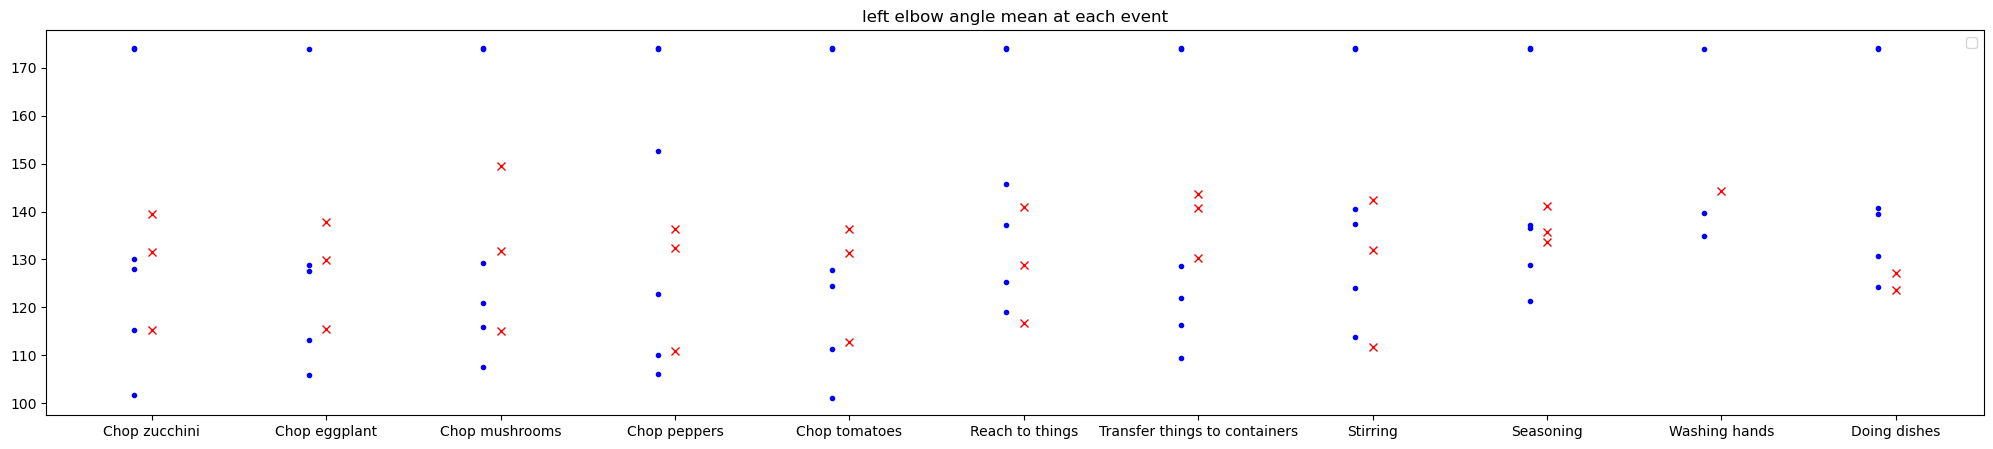

In [94]:
# width of the bars
barWidth = 0.1

#plot for 1 feature, lets take left elbow flexion

# x position of bars
r1 = np.arange(len(events))
r2 = [x + barWidth for x in r1]


plt.figure(figsize=(25, 5))
for key, i in zip(events_ordered, range(len(events_ordered))):
    H = []
    for id in participants['healthy']:
        df = pd.read_pickle(f'../data/features/secondary_features_{id}.pkl')
        H.append(df['rightelbow_angle'][key]['mean'])
    #plot for 1 feature, lets take right elbow flexion
    plt.plot(np.ones(len(H))*i, H, marker='.', linestyle='', color='b')
    print(H)
    A = []
    for id in participants['amputees']:
        df = pd.read_pickle(f'../data/features/secondary_features_{id}.pkl')
        A.append(df['rightelbow_angle'][key]['mean'])
    #plot for 1 feature, lets take right elbow flexion
    plt.plot(np.ones(len(A))*i + barWidth, A, marker='x', linestyle='', color='r')


    
    #plt.plot(np.ones(len(A))*barWidth*2, A, label = 'Amputees people', marker='x', linestyle='')

plt.xticks([r + barWidth for r in range(len(events_ordered))], events_ordered)
plt.title('left elbow angle mean at each event')
plt.legend()

Seems like there is an issue with YH0038 and OH0037. Their points are superposed around 170 degrees. Let's take a look more into it by producing the skeleton videos on raw data.

In [122]:
data_path = f'../data/ESK_data/body_kpts_YH0040.npy'
#data_npy_path = "../data/data_test_31.07.npy"
data_npy = np.load(data_path)

df_test = pd.DataFrame()
df_test['time'] = np.array([time/30 for time in range(len(data_npy))])
for i in range(17):
    df_point = pd.DataFrame(data_npy[:, i])
    df_test[f'point_{i}'] = df_point[[0, 1, 2]].to_numpy().tolist()
    df_test[f'point_{i}'] = [np.array(point) for point in df_test[f'point_{i}']]
df_test.rename(columns = {'point_0': 'nose', 'point_1': 'lefteye',
                        'point_2': 'righteye', 'point_3': 'leftear', 'point_4': 'rightear',
                        'point_5':'leftshoulder', 'point_6':'rightshoulder', 
                        'point_8':'rightelbow', 'point_7':'leftelbow', 
                        'point_10':'rightwrist', 'point_9':'leftwrist',
                        'point_12':'righthip', 'point_11':'lefthip',
                        'point_13': 'leftknee', 'point_14': 'rightknee',
                        'point_15': 'leftfoot', 'point_16': 'rightfoot'}, inplace = True)

"""     joints = ['leftshoulder_flex', 'rightshoulder_flex', 'leftshoulder_abduc',
    'rightshoulder_abduc', 'leftelbow_flex', 'rightelbow_flex',
    'trunk_forward_flex', 'trunk_lateral_flex', 'trunk_rotation'] """
df_test['neck'] = (df_test['leftshoulder'] + df_test['rightshoulder'])/2
df_test['hips'] = (df_test['lefthip'] + df_test['righthip'])/2

In [123]:
data_events_YH0038 = np.load(f'../data/ESK_data/YH0038.npy')
data_events_OH0037 = np.load(f'../data/ESK_data/OH0037.npy')
data_events_YH0040 = np.load(f'../data/ESK_data/YH0040.npy')
#Let's take during Chopping tomatoes
idx_YH0038 = np.where(data_events_YH0038 == events['Chop tomatoes'])
idx_OH0037 = np.where(data_events_OH0037 == events['Chop tomatoes'])
idx_YH0040 = np.where(data_events_YH0040 == events['Chop tomatoes'])

In [127]:
#df_test.iloc[idx_YH0040]
#video_skeleton('YH0040', df_test, 996, 1006)

Both healthy people body points generation indeed failed. Let's continue the statistics without those two for now.
Keep in mind that the df_healthy and df_healthy_stats should be updated then.

## Heatmap 
Let's calculate the z-score for each amputees, and take the mean of that for the value of each cell of the heatmap

In [215]:
df_healthy_stds = pd.DataFrame(columns=features, index=events_ordered)
df_healthy_RoMs = pd.DataFrame(columns=features, index=events_ordered)
df_healthy_means = pd.DataFrame(columns=features, index=events_ordered)
df_amputees_stds = pd.DataFrame(columns=features, index=events_ordered)
df_amputees_RoMs = pd.DataFrame(columns=features, index=events_ordered)
df_amputees_means = pd.DataFrame(columns=features, index=events_ordered)

for col in features:
    #To initialize cells of dataframe as empty numpy array, to later avoid NaN values 
    df_healthy_stds[col] = [np.empty(0,dtype=float)]*len(df_healthy_stds)
    df_healthy_RoMs[col] = [np.empty(0,dtype=float)]*len(df_healthy_RoMs)   
    df_healthy_means[col] = [np.empty(0,dtype=float)]*len(df_healthy_means)
    df_amputees_stds[col] = [np.empty(0,dtype=float)]*len(df_amputees_stds)
    df_amputees_RoMs[col] = [np.empty(0,dtype=float)]*len(df_amputees_RoMs)   
    df_amputees_means[col] = [np.empty(0,dtype=float)]*len(df_amputees_means)

for id_h in participants['healthy']:
    df = pd.read_pickle(f'../data/features/secondary_features_{id_h}.pkl')
    for col in features:
        for key in events_ordered:
            df_healthy_stds[col][key] = np.append(df_healthy_stds[col][key], df[col][key]['std'])
            df_healthy_RoMs[col][key] = np.append(df_healthy_RoMs[col][key], df[col][key]['RoM'])
            df_healthy_means[col][key] = np.append(df_healthy_means[col][key], df[col][key]['RoM'])

for id_a in participants['amputees']:
    df = pd.read_pickle(f'../data/features/secondary_features_{id_a}.pkl')
    for col in features:
        for key in events_ordered:
            df_amputees_stds[col][key] = np.append(df_amputees_stds[col][key], df[col][key]['std'])
            df_amputees_RoMs[col][key] = np.append(df_amputees_RoMs[col][key], df[col][key]['RoM'])
            df_amputees_means[col][key] = np.append(df_amputees_means[col][key], df[col][key]['RoM'])

#-----------------------------------------------------------------

df_zscore_std = pd.DataFrame(columns=features, index=events_ordered)
df_zscore_mean = pd.DataFrame(columns=features, index=events_ordered)
df_zscore_RoM = pd.DataFrame(columns=features, index=events_ordered)
#df_healthy_stats = pd.read_pickle('../data/features/secondary_features_healthy.pkl')

for id_a in participants['amputees']:
    df_a = pd.read_pickle(f'../data/features/secondary_features_{id_a}.pkl')
    for col in features:
        for key in events_ordered:
            mu_mean = np.nanmean(df_healthy_means[col][key])
            mu_std = np.nanmean(df_healthy_stds[col][key])
            mu_RoM = np.nanmean(df_healthy_RoMs[col][key])

            theta_mean = np.nanstd(df_healthy_means[col][key])
            theta_std = np.nanstd(df_healthy_stds[col][key])
            theta_RoM = np.nanstd(df_healthy_RoMs[col][key])

            x_mean = df_a[col][key]['mean']
            x_std = df_a[col][key]['std']
            x_RoM = df_a[col][key]['RoM']

            z_mean = (x_mean - mu_mean)/theta_mean
            z_std = (x_std - mu_std)/theta_std
            z_RoM = (x_RoM - mu_RoM)/theta_RoM

            df_zscore_std[col][key] = np.append(df_zscore_std[col][key], z_std)
            df_zscore_mean[col][key] = np.append(df_zscore_mean[col][key], z_mean)
            df_zscore_RoM[col][key] = np.append(df_zscore_RoM[col][key], z_RoM)

#apply mean of z-scores in each cell
df_zscore_mean = df_zscore_mean.applymap(np.nanmean)
df_zscore_std = df_zscore_std.applymap(np.nanmean)
df_zscore_RoM = df_zscore_RoM.applymap(np.nanmean)

""" for col in features:
    #To initialize cells of dataframe as empty numpy array, to later avoid NaN values 
    df_zscore_std[col] = [np.empty(0,dtype=float)]*len(df_zscore_std)
    df_zscore_mean[col] = [np.empty(0,dtype=float)]*len(df_zscore_mean)
    df_zscore_RoM = [np.empty(0,dtype=float)]*len(df_zscore_RoM)

for id_a in participants['amputees']:
    df_a = pd.read_pickle(f'../data/features/secondary_features_{id_a}.pkl')
    for col in features:
        for key in events_ordered:
            mu = df_healthy_stats[col][key]['mean']
            theta = df_healthy_stats[col][key]['std']
            x = df_a[col][key]['mean']
            z = (x - mu)/theta
            df_zscore[col][key] = np.append(df_zscore[col][key], z)
#apply mean of z-scores in each cell
df_zscore = df_zscore.applymap(np.nanmean) """

" for col in features:\n    #To initialize cells of dataframe as empty numpy array, to later avoid NaN values \n    df_zscore_std[col] = [np.empty(0,dtype=float)]*len(df_zscore_std)\n    df_zscore_mean[col] = [np.empty(0,dtype=float)]*len(df_zscore_mean)\n    df_zscore_RoM = [np.empty(0,dtype=float)]*len(df_zscore_RoM)\n\nfor id_a in participants['amputees']:\n    df_a = pd.read_pickle(f'../data/features/secondary_features_{id_a}.pkl')\n    for col in features:\n        for key in events_ordered:\n            mu = df_healthy_stats[col][key]['mean']\n            theta = df_healthy_stats[col][key]['std']\n            x = df_a[col][key]['mean']\n            z = (x - mu)/theta\n            df_zscore[col][key] = np.append(df_zscore[col][key], z)\n#apply mean of z-scores in each cell\ndf_zscore = df_zscore.applymap(np.nanmean) "

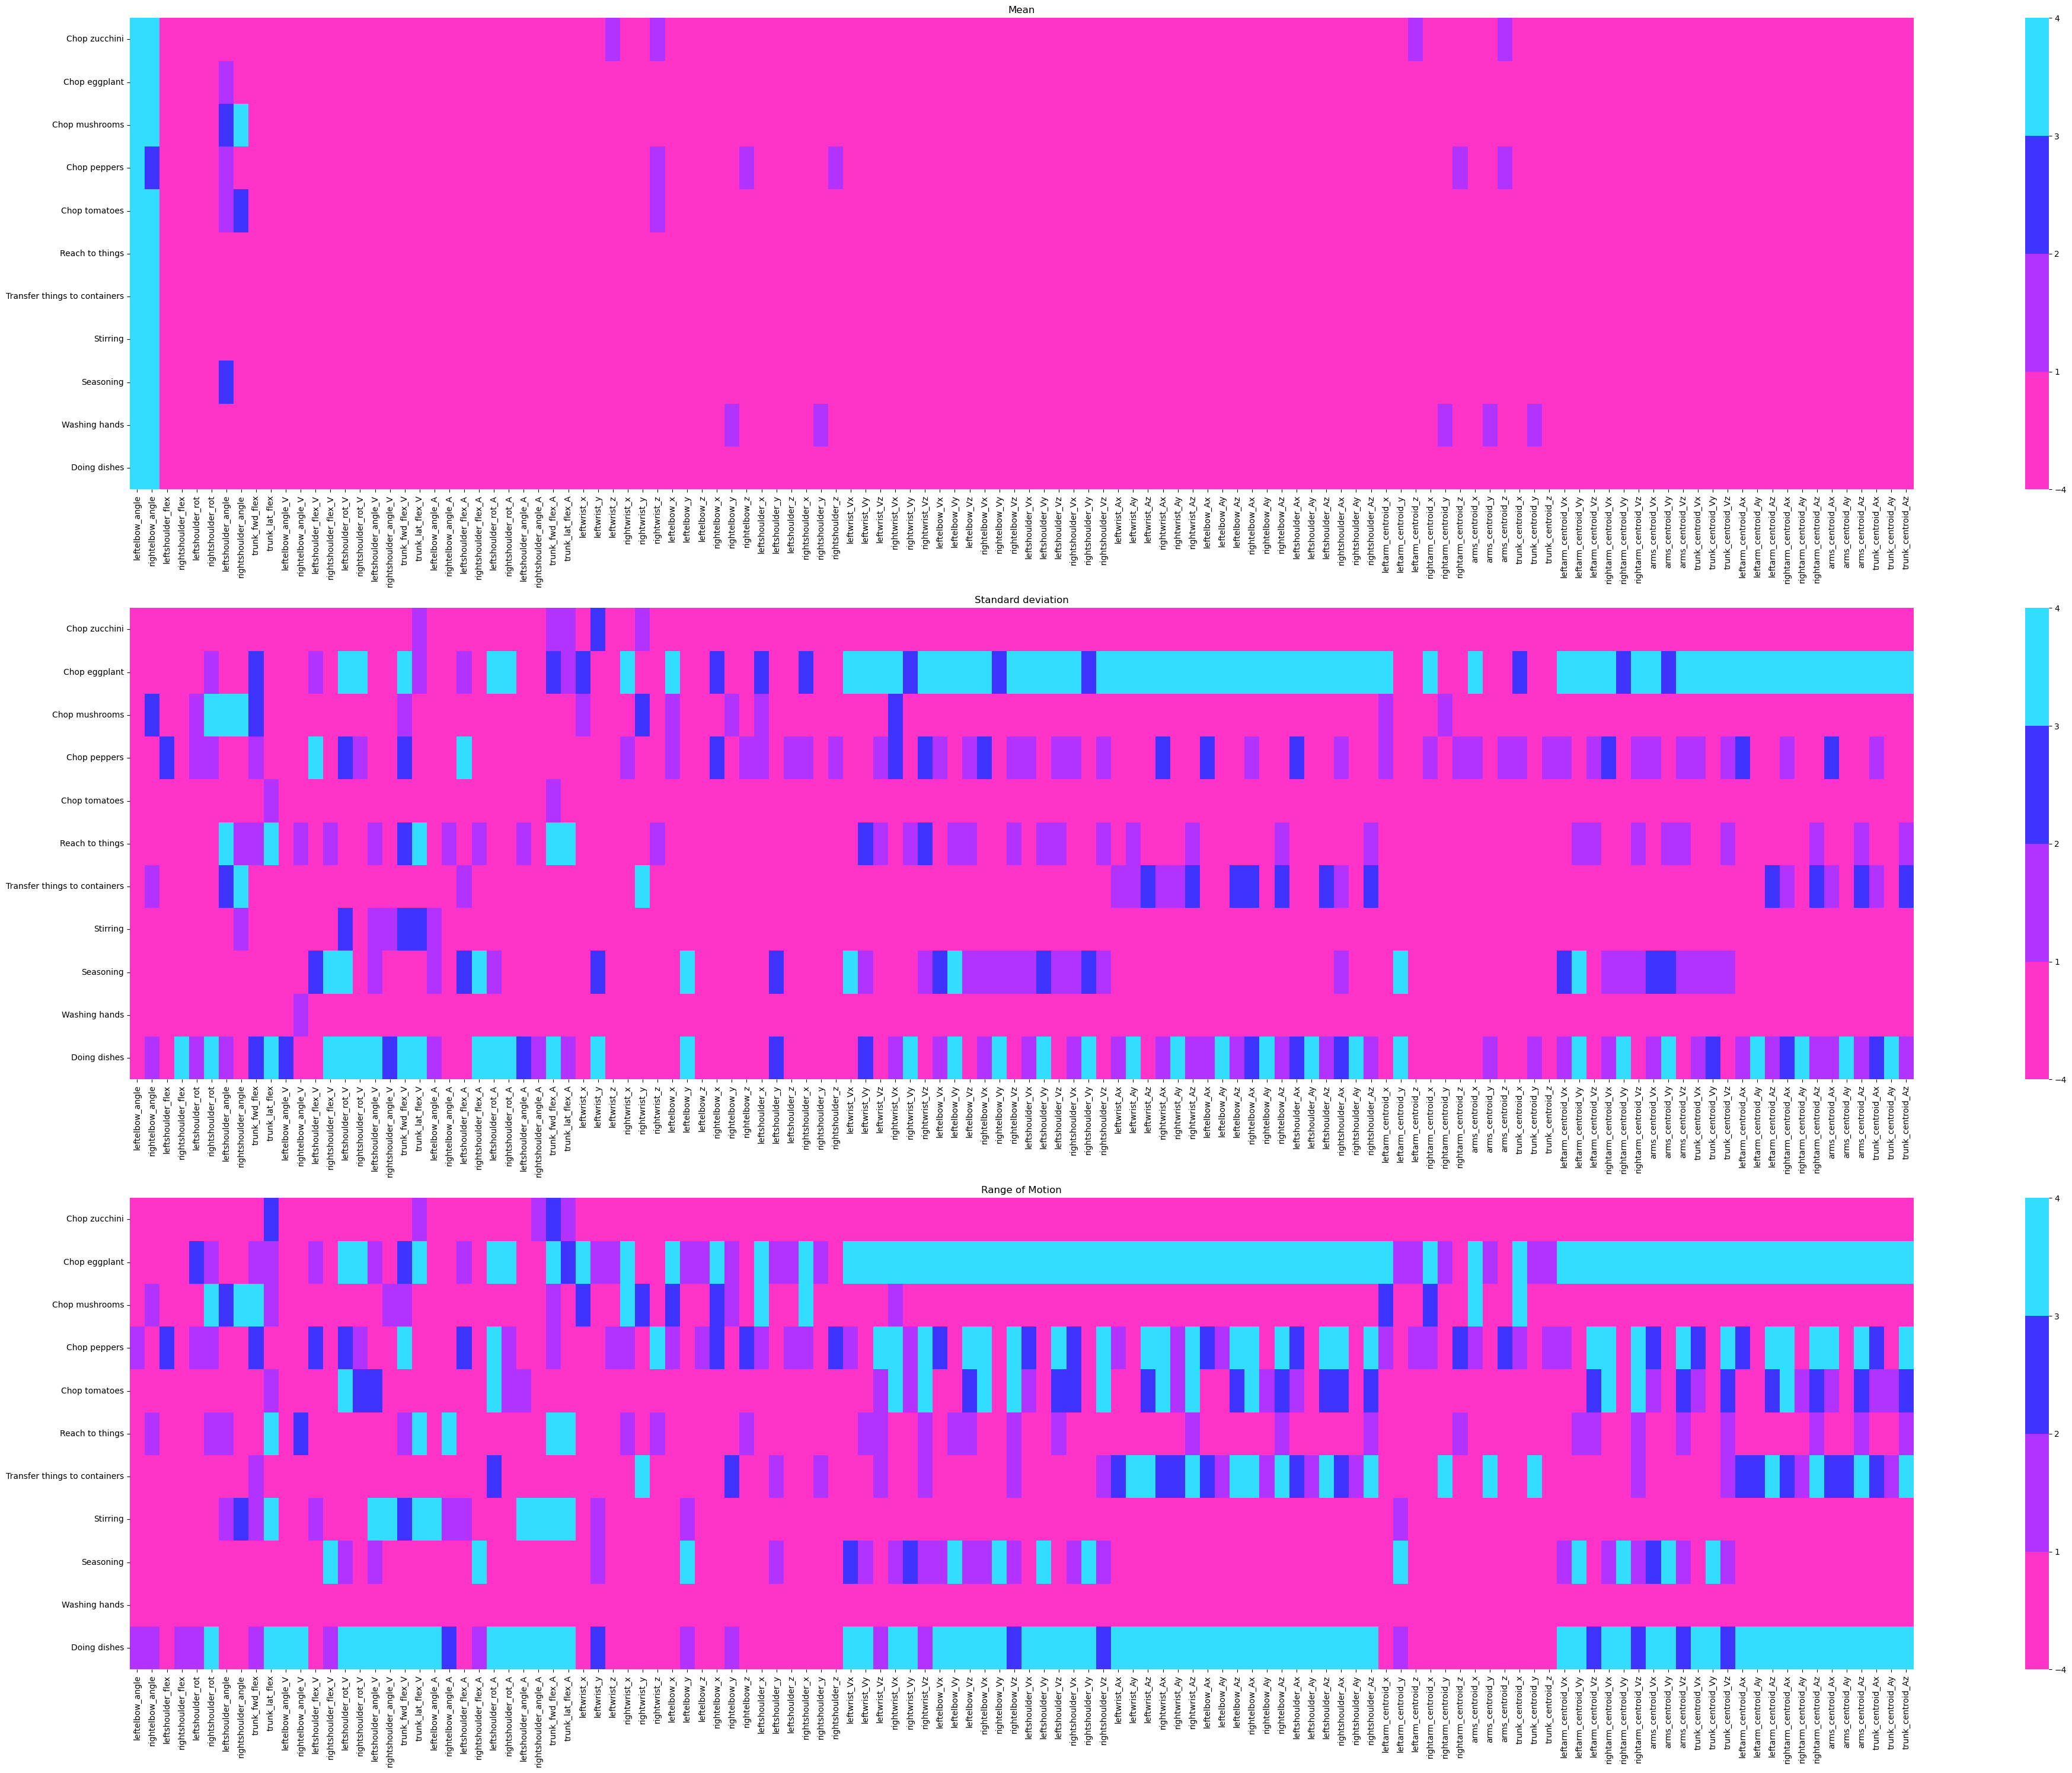

In [216]:
cmap_dict = {0: '#FF33C7', 1: '#B233FF', 2: '#3F33FF', 3: '#33DDFF'}
cmap = ListedColormap([cmap_dict[i] for i in range(4)])

bounds = [-4, 1, 2, 3, 4]
my_norm = BoundaryNorm(bounds, ncolors=len(cmap_dict))


fig, ax = plt.subplots(3, figsize=(40,30))  
sns.heatmap(df_zscore_mean, ax = ax[0], cmap = cmap, norm = my_norm)
ax[0].set_title('Mean')
sns.heatmap(df_zscore_std, ax = ax[1], cmap = cmap, norm = my_norm)
ax[1].set_title('Standard deviation')
sns.heatmap(df_zscore_RoM, ax = ax[2], cmap = cmap, norm = my_norm)
ax[2].set_title('Range of Motion')
plt.tight_layout()

### Heatmap for each amputees

In [ ]:
amputee
df.applymap(lambda x: x[0])

### Other plots, for each feature

In [246]:
# width of the bars
barWidth = 0.1

#plot for 1 feature, lets take left elbow flexion

# x position of bars
#r1 = np.arange(len(events))
#r2 = [x + barWidth for x in r1]

red_patch = mpatches.Patch(color='red', label='Amputees')
blue_patch = mpatches.Patch(color='blue', label='Healthy')

for col in features:
    plt.figure(figsize=(25, 5))
    for key, i in zip(events_ordered, range(len(events_ordered))):
        
        #for col in features:
        H = []
        for id in participants['healthy']:
            df = pd.read_pickle(f'../data/features/secondary_features_{id}.pkl')
            H.append(df[col][key]['mean'])
        #To remove nan values
        H = [element for element in H if not np.isnan(element)]
        plt.plot(np.ones(len(H))*i, H, marker='.', linestyle='', color='b')
        A = []
        for id in participants['amputees']:
            df = pd.read_pickle(f'../data/features/secondary_features_{id}.pkl')
            A.append(df[col][key]['mean'])
        #plot for 1 feature, lets take right elbow flexion
        A = [element for element in A if not np.isnan(element)]
        plt.plot(np.ones(len(A))*i + barWidth, A, marker='x', linestyle='', color='r')
            
    plt.xticks([r + barWidth for r in range(len(events_ordered))], events_ordered)
    plt.title(f'{col} mean at each event')
    plt.legend(handles = [blue_patch, red_patch])
    plt.savefig(f'../data/figures/mean/{col}_mean.png')
    plt.close()

[-0.04337574026447351, -0.007866245737387837, 0.0029401832665236515, 0.0001337146833281717]
[-0.015932181636191933, 0.0011134546198636533, 0.0011532928724958655, -0.0006458024512701957]
[0.01275567351096028, -0.011355001054639326, -0.05550124903386141, -0.016477134667256883]
[-0.005944419982193576, -0.004488003260071479, 0.0008385481130528115, 0.0003516355460586749]
[-0.014009421082638319, 0.00884767208491181, 0.002136532879616246, 0.0014163456258411648]
[-0.8274530364737219, -0.5604830843049643, -1.8871745533345041, -0.2564860985842939]
[0.015838086583065812, -0.024823593584805653, 0.007036669122787294, -0.000929409609738201]
[-0.01741274489571246, 0.020024369820705892, -0.035738745767250626, 0.008989413229571332]
[0.005438041654790234, -0.004561710577438661, -0.1854028689727445, 0.008327017374556588]
[0.6614068287187255, -0.9189062235596999]
[-5.096893770221431e-05, 0.0005726612660914219, 0.0029189199471946277, 0.00300978616832996]
[32.66525501480017, 62.6442224714952, 35.28362511804

In [241]:
A

[47.44819477540807, 52.4047384095596]

In [229]:
H

[-5.096893770221431e-05,
 0.0005726612660914219,
 0.0029189199471946277,
 0.00300978616832996,
 32.74524326209626,
 64.46963021688369,
 38.03615282857042,
 42.16697291787615]

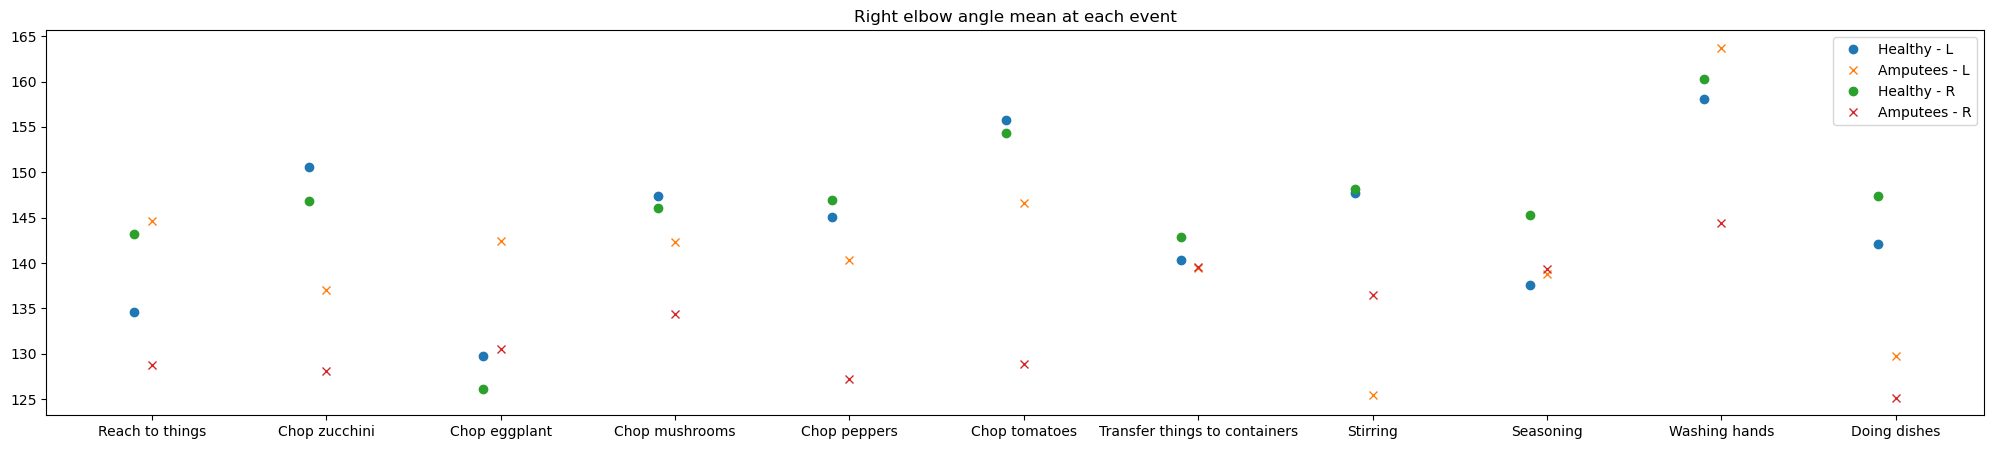

In [4]:
# width of the bars
barWidth = 0.1

#plot for 1 feature, lets take right elbow flexion
y_h_l = df_healthy_stats['leftelbow_angle']
y_a_l = df_amputees_stats['leftelbow_angle']
y_h_r = df_healthy_stats['rightelbow_angle']
y_a_r = df_amputees_stats['rightelbow_angle']
# x position of bars
r1 = np.arange(len(events))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(25, 5))
#plot for 1 feature, lets take right elbow flexion
plt.plot(r1, [row['mean'] for row in y_h_l], label = 'Healthy - L', marker='o', linestyle='')
plt.plot(r2, [row['mean'] for row in y_a_l], label = 'Amputees - L', marker='x', linestyle='')
plt.plot(r1, [row['mean'] for row in y_h_r], label = 'Healthy - R', marker='o', linestyle='')
plt.plot(r2, [row['mean'] for row in y_a_r], label = 'Amputees - R', marker='x', linestyle='')
plt.xticks([r + barWidth for r in range(len(y_h_l))], events.keys())
plt.title('Right elbow angle mean at each event')
plt.legend()

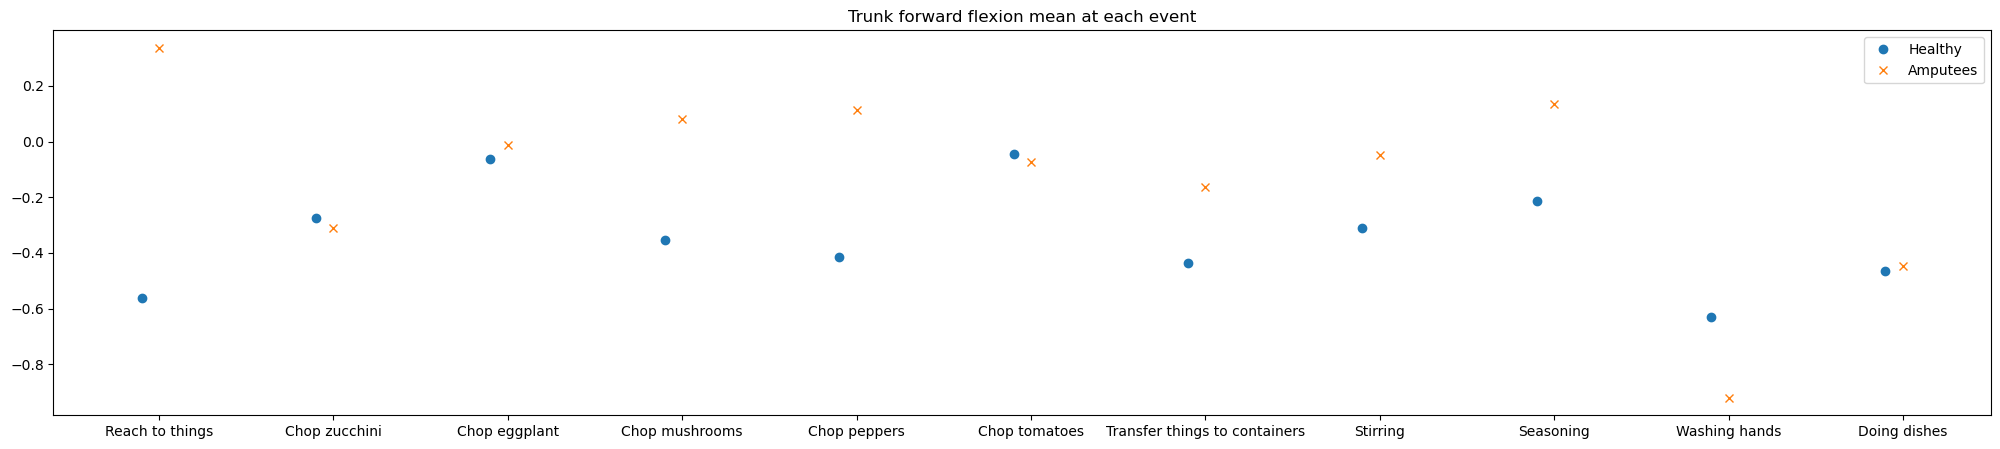

In [6]:
# width of the bars
barWidth = 0.1

#plot for 1 feature, lets take right elbow flexion
y_h = df_healthy_stats['trunk_lat_flex']
y_a = df_amputees_stats['trunk_lat_flex']
# x position of bars
r1 = np.arange(len(events))
r2 = [x + barWidth for x in r1]


plt.figure(figsize=(25, 5))
#plot for 1 feature, lets take right elbow flexion
plt.plot(r1, [row['mean'] for row in y_h], label = 'Healthy', marker='o', linestyle='')
plt.plot(r2, [row['mean'] for row in y_a], label = 'Amputees', marker='x', linestyle='')

plt.xticks([r + barWidth for r in range(len(y_h_l))], events.keys())
plt.title('Trunk forward flexion mean at each event')
plt.legend()